basert på ligningen $ a\cdot \frac{\partial^2 x}{\partial t^2} + b\cdot \frac{\partial x}{\partial t} c\cdot x = f(t)$

# Hvordan bruke ODE-løseren

1. Variablene a, b og c kan endres mens du kjører scriptet interaktivt
2. Eksitasjonskraften kan endres i funksjonen f(t) under. (standard satt til 0)
3. Lengden på intervallet som vises settes i funksjonen tspan
4. Initial bettingelsene for ligningen må settes i x0
5. Når du ønsker å starte den interaktive visningen, Trykk "run" knappen til du har kjørt alle blokkene
6. Hvis du gjør endringer på f(t) eller x0 trykk "reset & run" knappen (ser ut som spole-knapp)

In [1]:
import numpy as np

def f(t): # f(t) eksitasjonskraft
  return   0 #np.cos(t)

In [2]:
tspan = np.linspace(0, 50, 1000) # [start, slutt, antall steg]

In [3]:
x0 = [1,0] #initial-betingelser  [x(0)-posisjon, x'(0)-fart]

FloatSlider(value=1.0, continuous_update=False, description='A:', max=1.0, min=0.1, readout_format='.1f')

FloatSlider(value=1.0, continuous_update=False, description='B:', max=1.0, readout_format='.1f')

FloatSlider(value=1.0, continuous_update=False, description='C:', max=1.0, readout_format='.1f')

<IPython.core.display.Javascript object>


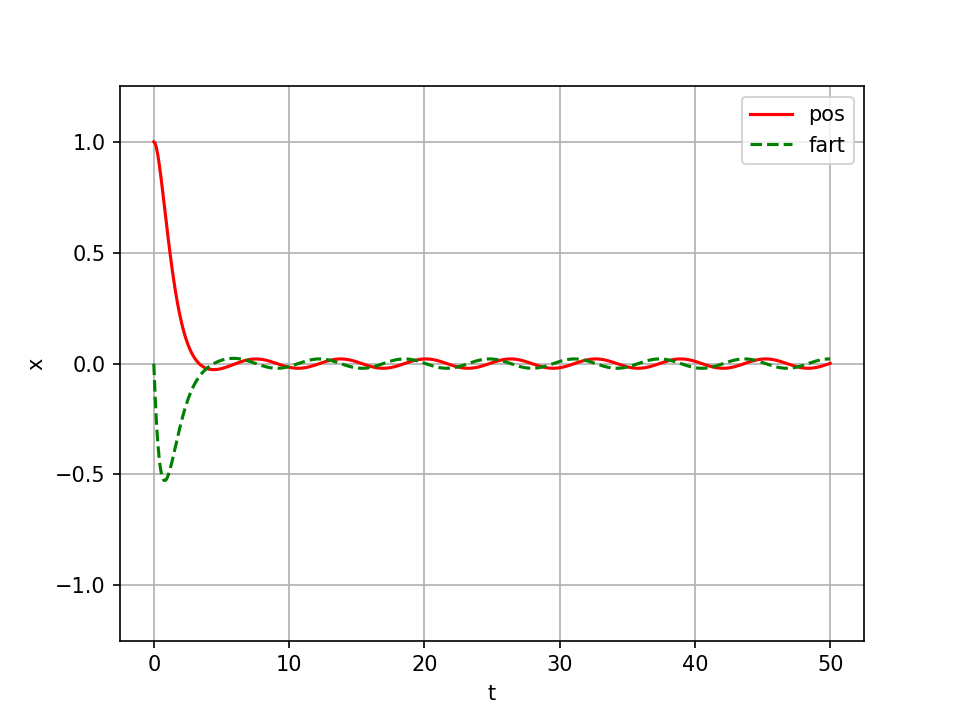

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as widgets


a_s = widgets.FloatSlider(
    value=1,
    min=0.1,
    max=1.0,
    step=0.1,
    description='A:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

b_s = widgets.FloatSlider(
    value=1,
    min=0,
    max=1.0,
    step=0.1,
    description='B:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

c_s = widgets.FloatSlider(
    value=1,
    min=0,
    max=1.0,
    step=0.1,
    description='C:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

display(a_s)
display(b_s)
display(c_s)

a = a_s.value
b = b_s.value
c = c_s.value


def model(X,t): #dX/dt #ax''+bx'+cx=f(t)
  x = X[0]
  y = X[1]
  dxdt = (-b_s.value*y-c_s.value*x+f(t))/a_s.value
  dydt = y
  return [dydt,dxdt]
    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_ylim([-1.25,1.25])
line, = ax.plot(tspan,tspan,'r')
line2, = ax.plot(tspan,tspan,'g--')

plt.xlabel('t')
plt.ylabel('x')
plt.legend(['pos','fart'])
plt.grid()

def cb(change):
    
    a = a_s.value
    b = b_s.value
    c = c_s.value

    sol = odeint(model,x0,tspan)
    xs = sol[:,0]
    xs_dt=sol[:,1]

    line.set_ydata(xs)
    line2.set_ydata(xs_dt)
    fig.canvas.draw_idle()

a_s.observe(cb)
b_s.observe(cb)
c_s.observe(cb)
